### Cumulative Flow Diagram Notes

In [34]:
from wwibd import metrics

timestamps = {'a': [1, 2, 3, 5, 7], 'b': [2.5, 5.7, 6.5, 8.8, 9.1]}
cycle_times_df = metrics.cycle_times(['Build', 'Verify'], timestamps)

cycle_times_df


Arrival  Build_started  Build_completed  Verify_started  Verify_completed  \
a      1.0            2.0              3.0             5.0               7.0   
b      2.5            5.7              6.5             8.8               9.1   

   Started  Completed  Cycle_time  
a      2.0        7.0         5.0  
b      5.7        9.1         3.4

In [35]:
flow_columns = cycle_times_df.columns[1:-3]
flow_data = cycle_times_df[flow_columns]
flow_data

Build_started  Build_completed  Verify_started  Verify_completed
a            2.0              3.0             5.0               7.0
b            5.7              6.5             8.8               9.1

In [36]:
event_stream = flow_data.stack().sort_values()

In [37]:
event_stream.sort_values()

a  Build_started       2.0
   Build_completed     3.0
   Verify_started      5.0
b  Build_started       5.7
   Build_completed     6.5
a  Verify_completed    7.0
b  Verify_started      8.8
   Verify_completed    9.1
dtype: float64

In [38]:
import pandas as pd
import numpy as np

In [39]:
n = len(event_stream) + 1

# set first to timestamp just before the first observation in the event stream
t = np.zeros(n)
t[0] = event_stream[0] - 1 

counts = { 'Time': t }
for c in flow_columns:
    counts[c] = np.zeros(n)

for i, evt in enumerate(event_stream.sort_values().items()):
    prev = i
    now = i + 1

    time_stamp = evt[1]
    work_item_id =  evt[0][0]
    flow_event_id = evt[0][1]
    
    t[now] = time_stamp
    for c in flow_columns:
        counts[c][now] = counts[c][prev]                        # copy previous values 
    counts[flow_event_id][i+1] = counts[flow_event_id][i] + 1   # increment flow count for this event

cfd_df = pd.DataFrame(counts)
cfd_df

Time  Build_started  Build_completed  Verify_started  Verify_completed
0   1.0            0.0              0.0             0.0               0.0
1   2.0            1.0              0.0             0.0               0.0
2   3.0            1.0              1.0             0.0               0.0
3   5.0            1.0              1.0             1.0               0.0
4   5.7            2.0              1.0             1.0               0.0
5   6.5            2.0              2.0             1.0               0.0
6   7.0            2.0              2.0             1.0               1.0
7   8.8            2.0              2.0             2.0               1.0
8   9.1            2.0              2.0             2.0               2.0

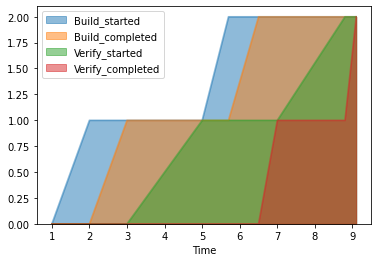

In [40]:
cfd_df.plot.area(x='Time', stacked=False);